In [1]:
import numpy
import pandas as pd

# Import data and cleaning

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')

df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [5]:
df.sample()['clean_comment'].values

array(['and non vegetarians don like see vegetarians let eat them '],
      dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [8]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [9]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [10]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(350)

In [14]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [18]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\1436122792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].str.lower()


In [20]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the changes
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\3434843071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].str.strip()


np.int64(0)

In [21]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,clean_comment,category


In [22]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()


,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [23]:
# Remove new line characters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining


C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\2026800476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)


,clean_comment,category


# EDA

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='category', ylabel='count'>

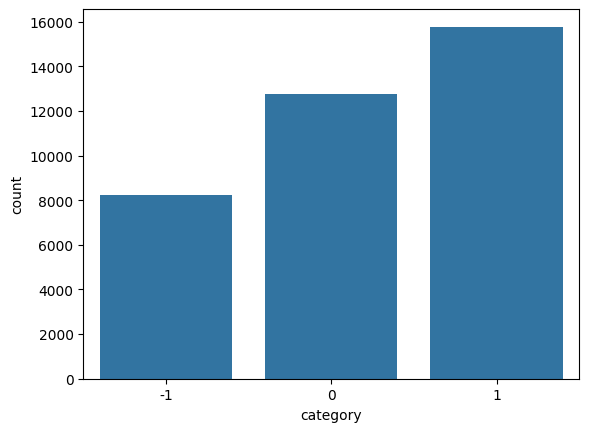

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


# distribution of classes
sns.countplot(x='category', data=df)

In [26]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [27]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\365054908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))


In [28]:
df.sample(5)

,clean_comment,category,word_count
15101,future anurag kashyap movie,0,4
28478,where are the warmongers that were calling for...,0,10
11544,since also increase their own books whenever t...,1,71
7862,noticed that modi hands shake when rests them ...,0,27
6258,mmw india will remain third world country next...,1,34


In [29]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

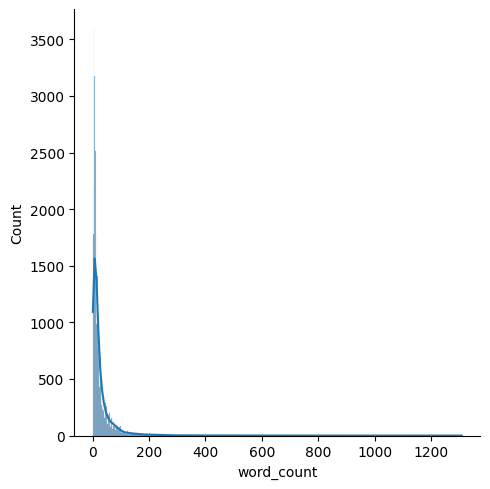

In [32]:
# plot histogram of word count
sns.displot(df['word_count'], kde=True)

C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\1846227146.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


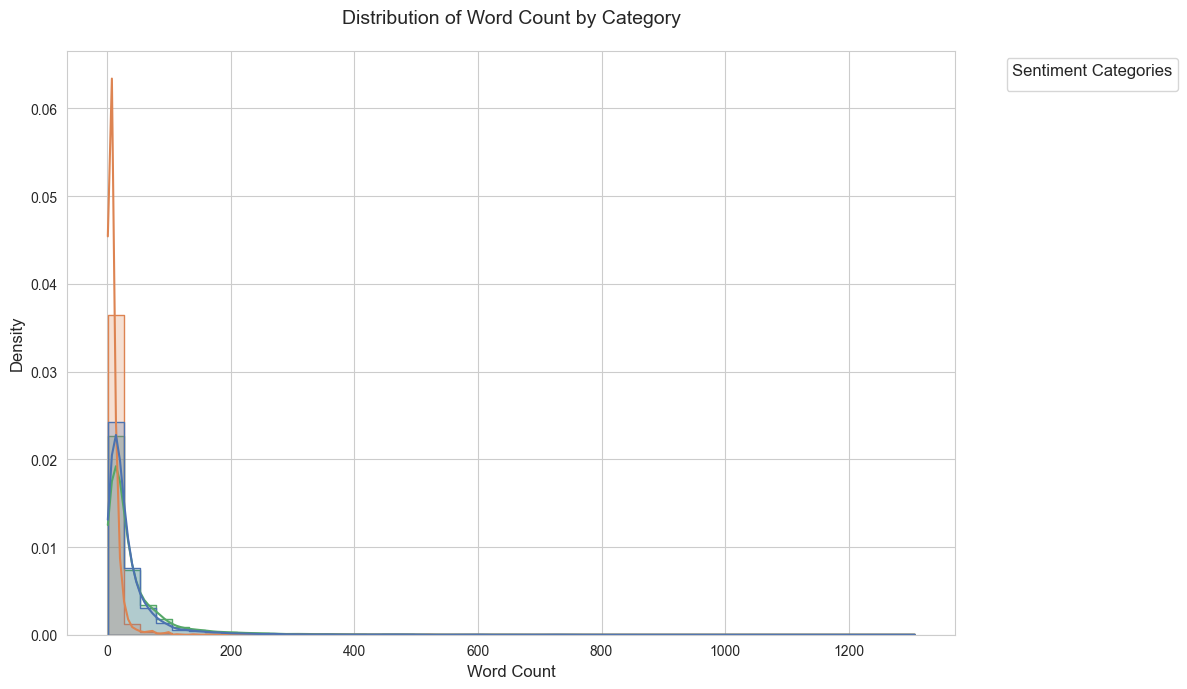

In [37]:
# Plot the distribution of word count for each category with different colors
plt.figure(figsize=(12, 7))  # Larger figure for better visibility
sns.set_style("whitegrid")  # Add grid for better readability

# Create the plot
ax = sns.histplot(
    data=df,
    x="word_count",
    hue="category",
    bins=50,
    kde=True,
    palette="deep",  # Using 'deep' palette for better contrast
    element="step",
    stat="density",
    common_norm=False,
)

# Customize the plot
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Word Count by Category", fontsize=14, pad=20)

# Get current handles and labels
handles, labels = ax.get_legend_handles_labels()
category_labels = sorted(df['category'].unique())

# Create descriptive labels for categories
label_map = {
    str(cat): f"Category {cat} - {'Negative' if cat == 0 else 'Neutral' if cat == 1 else 'Positive'}" 
    for cat in category_labels
}
new_labels = [label_map.get(label, label) for label in labels]

# Place legend outside plot to ensure visibility
plt.legend(
    handles=handles,
    labels=new_labels,
    title="Sentiment Categories",
    title_fontsize=12,
    fontsize=10,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.show()



<Axes: ylabel='word_count'>

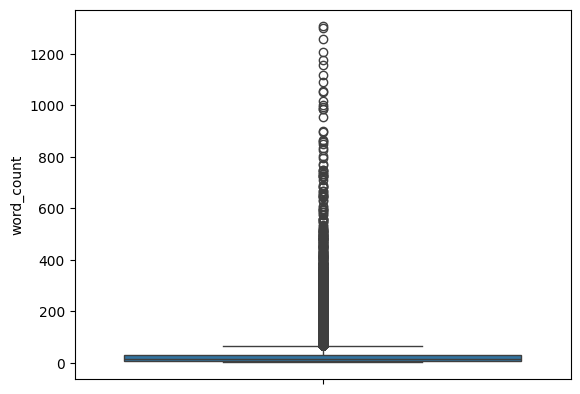

In [35]:
sns.boxplot(df['word_count'])

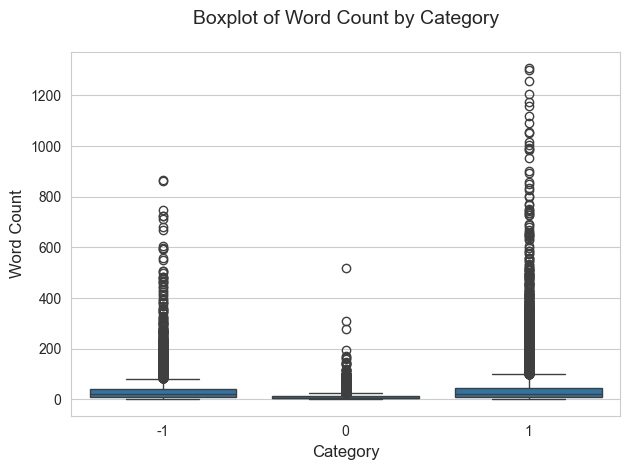

In [38]:
# create boxplot by the 3 category

sns.boxplot(x="category", y="word_count", data=df)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Word Count", fontsize=12)
plt.title("Boxplot of Word Count by Category", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [ ]:
# !pip install nltk

In [39]:
import nltk

In [40]:
## create a column 'num_stop_words' by counting the number of stop words in the 'clean_comment' column

# Count the number of stop words in each 'clean_comment' using nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def count_stop_words(text: str) -> int:
    """Count the number of stop words in a given text.

    Args:
        text (str): Input text.

    Returns:
        int: Number of stop words in the text.
    """
    if not isinstance(text, str):
        return 0
    return sum(word in stop_words for word in text.split())

df['num_stop_words'] = df['clean_comment'].apply(count_stop_words)

df.sample(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hadi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\2336790988.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_stop_words'] = df['clean_comment'].apply(count_stop_words)


,clean_comment,category,word_count,num_stop_words
25899,meanwhile fast and furious sales increase lucknow,1,7,1
16818,this article adblocker unfriendly following th...,-1,194,43
6739,arvind kejriwal,0,2,0
5756,country where hindu values and culture respect...,1,15,4
33916,any reason not get this instead modi next buy ...,0,13,3


In [41]:
# create a new column 'num_chars'

# create a new column 'num_chars'
df['num_chars'] = df['clean_comment'].apply(lambda x: len(x) if isinstance(x, str) else 0)

df.sample(5)

C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\740170985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_chars'] = df['clean_comment'].apply(lambda x: len(x) if isinstance(x, str) else 0)


,clean_comment,category,word_count,num_stop_words,num_chars
24257,kwality,0,1,0,7
7725,based indian leader talking about legitimate e...,-1,30,10,181
22475,always think about this song when ever corpora...,0,11,4,71
25835,ैो े ी ी ा ा आपको ी ीं sachin pilot bjp spoke ...,0,16,0,60
2465,ideally affordable health care should human ri...,1,87,27,576


In [42]:
# Create 'num_punctutation_chars' column

df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '!@#$%^&*()_+-=[]{}|;:,.<>?'])
)

df.sample(5)


C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\2243977014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_punctuation_chars'] = df['clean_comment'].apply(


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
16062,acche din for some least,-1,5,2,24,0
13547,this whatsapp forward any actual sources,0,6,2,40,0
5022,how much does cost criticize some verbal writt...,1,39,11,241,0
28982,lol where should back back his private jet,1,8,3,42,0
31121,sorry major not supposed tell you this,-1,7,3,38,0


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    """_summary_

    Args:
        corpus (_type_): _description_
        n (_type_, optional): _description_. Defaults to None.

    Returns:
        _type_: _description_
    """
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

top_25_bigrams

[('free encyclopedia', np.int64(623)),
 ('encyclopedia team', np.int64(598)),
 ('good good', np.int64(409)),
 ('prime minister', np.int64(389)),
 ('best overall', np.int64(375)),
 ('don know', np.int64(352)),
 ('looks like', np.int64(339)),
 ('don think', np.int64(334)),
 ('team reached', np.int64(322)),
 ('social media', np.int64(316)),
 ('movie movie', np.int64(276)),
 ('narendra modi', np.int64(272)),
 ('rahul gandhi', np.int64(264)),
 ('lot lot', np.int64(232)),
 ('reached free', np.int64(224)),
 ('right wing', np.int64(207)),
 ('team sports', np.int64(206)),
 ('overall submitter', np.int64(204)),
 ('submitter best', np.int64(195)),
 ('just like', np.int64(189)),
 ('movie good', np.int64(183)),
 ('amit shah', np.int64(169)),
 ('overall post', np.int64(168)),
 ('people like', np.int64(162)),
 ('post best', np.int64(162))]

C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\2247753320.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=top_25_bigrams_df, palette='magma')


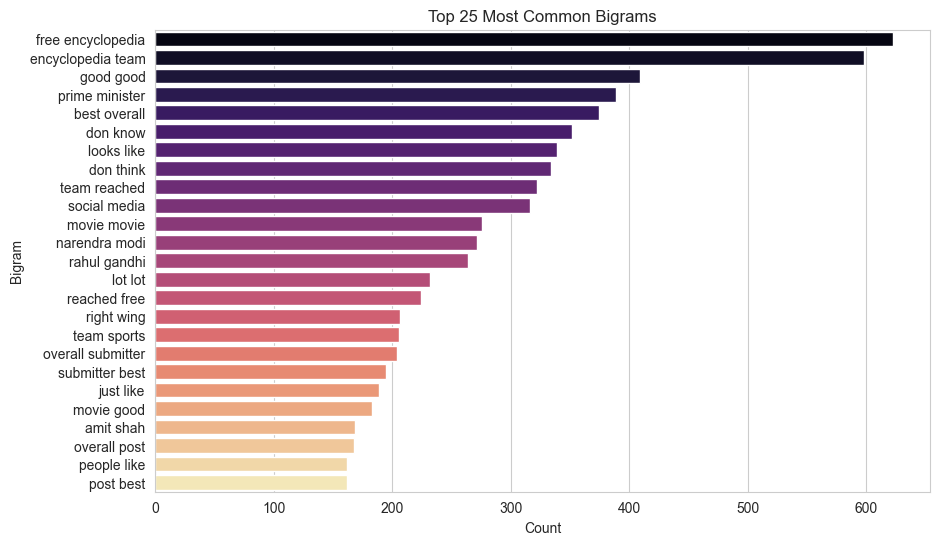

In [45]:
# Convert into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the top 25 bigrams using barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='bigram', data=top_25_bigrams_df, palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

In [46]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\2447177129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [47]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\1099723544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].apply(


In [48]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hadi\AppData\Roaming\nltk_data...
C:\Users\Hadi\AppData\Local\Temp\ipykernel_17076\1392873733.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].apply(


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


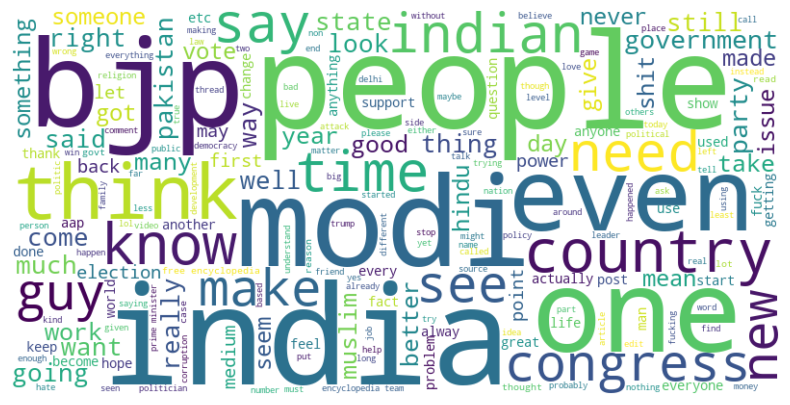

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(df['clean_comment'])

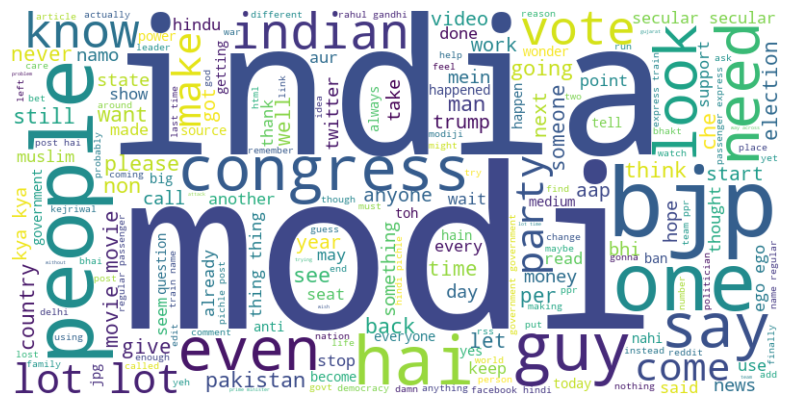

In [50]:
plot_word_cloud(df[df['category'] == 0]['clean_comment'])

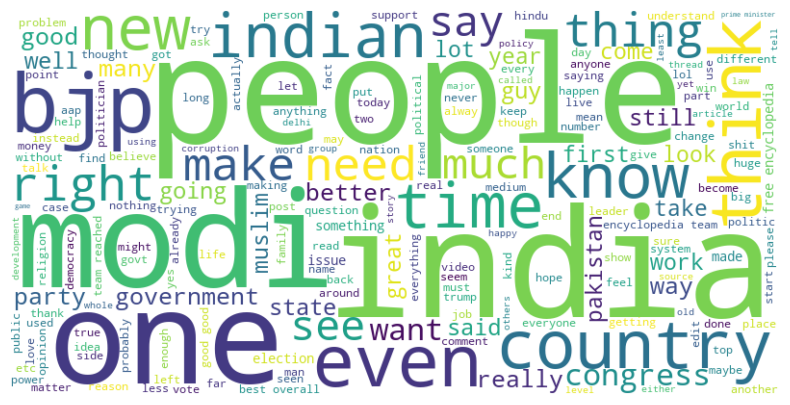

In [51]:
plot_word_cloud(df[df['category'] == 1]['clean_comment'])

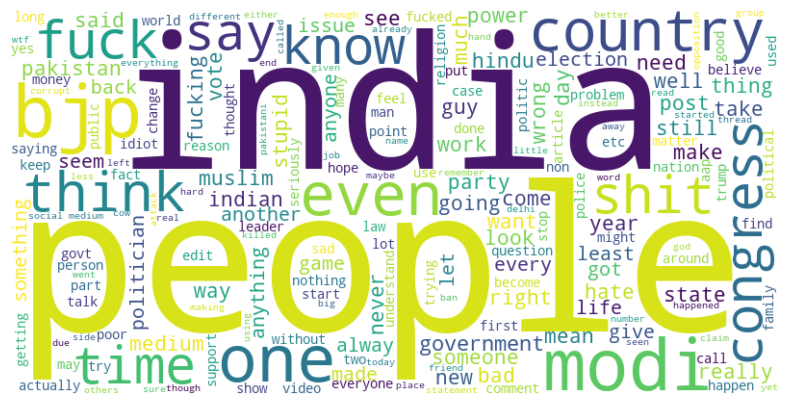

In [52]:
plot_word_cloud(df[df['category'] == -1]['clean_comment'])